In [5]:
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
from pylab import pcolor, colorbar, plot

import pandas as pd
import numpy as np

Pre-processamento dos dados

In [2]:
base = pd.read_csv('credit_data.csv')
base = base.dropna()
base.loc[base.age < 0, 'age'] = 40.92

In [68]:
base.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


Obtenção das classes para o treinamento da rede

In [3]:
X = base.iloc[:, 0:4].values
y = base.iloc[:, 4].values

Aplicar normalização entre 0 e 1

In [6]:
normalizador = MinMaxScaler(feature_range = (0,1))
X = normalizador.fit_transform(X)

Construção do mapa auto organizado
x: Número de linhas do mapa
y: Número de colunas do mapa

In [56]:
som = MiniSom(x = 15, y = 15, input_len = 4, sigma=1.0, learning_rate=0.5, random_seed = 0)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

In [43]:
som._weights

array([[[0.79630809, 0.85925094, 0.57651275, 0.69866478],
        [0.16827959, 0.4673101 , 0.33449425, 0.06094421],
        [0.41062653, 0.91980869, 0.21061567, 0.61151505],
        [0.77151507, 0.16985764, 0.74455302, 0.24651231],
        [0.67222579, 0.83900293, 0.31826571, 0.41206423],
        [0.2680714 , 0.31252171, 0.4670227 , 0.13879726],
        [0.29931762, 0.41942917, 0.40526539, 0.3075981 ],
        [0.03704153, 0.26393358, 0.40149685, 0.28876791],
        [0.17433889, 0.63172254, 0.68353427, 0.36555225],
        [0.03191413, 0.68387293, 0.88358708, 0.29777955],
        [0.29347879, 0.79059951, 0.5012037 , 0.51072619],
        [0.36418658, 0.26510429, 0.80497165, 0.21592705],
        [0.12145368, 0.36515671, 0.53215013, 0.19009034],
        [0.04482078, 0.15941699, 0.85305734, 0.05850418],
        [0.12053705, 0.31923294, 0.69555756, 0.14375487]],

       [[0.80042019, 0.69254762, 0.52541803, 0.37373834],
        [0.71317195, 0.74555547, 0.43293449, 0.67347896],
        [0.6

In [44]:
som._activation_map

array([[0.86859525, 0.69145093, 0.79687401, 0.8682488 , 0.86606666,
        0.6121446 , 0.53351546, 0.53034196, 0.2943758 , 0.34546703,
        0.47704377, 0.53862216, 0.48347419, 0.62375959, 0.48168377],
       [0.84701217, 0.80060119, 0.97212957, 0.67308521, 0.41314524,
        0.34743304, 0.53200478, 0.4294599 , 0.426347  , 0.51801726,
        0.7118641 , 0.42517179, 0.53833633, 0.60598254, 0.62653633],
       [0.62900937, 0.50814227, 0.60919343, 0.62219334, 0.53089397,
        0.43394614, 0.59680799, 0.52029226, 0.66126107, 0.51563062,
        0.43629029, 0.63515851, 0.5346966 , 0.68353691, 0.57764425],
       [0.49960461, 0.43454601, 0.43449417, 0.30350188, 0.71285773,
        0.61117146, 0.75711206, 0.69070213, 0.59940984, 0.35167806,
        0.2247301 , 0.41562729, 0.52220015, 0.5484803 , 0.60306279],
       [0.49641871, 0.49570257, 0.50540263, 0.66617506, 0.6154301 ,
        0.7596722 , 0.5350462 , 0.67502211, 0.6586241 , 0.27400058,
        0.28928678, 0.3866236 , 0.37794297, 

Verificar quantas vezes cada neurônio foi selecionado como BMU

In [52]:
response = som.activation_response(X)

Calcular a média da distancia entre os neurônios
Quanto mais escuro é a cor de um neurônio, mais parecido ele é com seus vizinhos, equanto que quantom mais claro, mais diferente ele é de seus vizinhos. Os registros em Amarelo são os outliers.

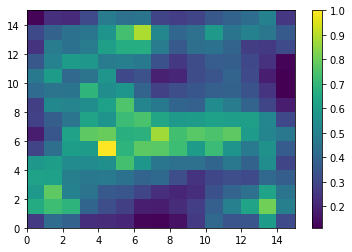

In [57]:
pcolor(som.distance_map().T)
colorbar()

Verificar qual neurônio foi selecionado como bast match unit (BMS) para um determinado registro. Com isso, é possivel criar marcadores para identificar onde cada registro da base de dados se encaixa.

In [58]:
x = som.winner(X[0])
x

(4, 10)

Definição das classes e dos marcadores

In [59]:
markers = ['o', 's']
colors = ['r', 'g']

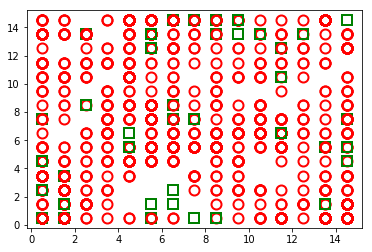

In [67]:
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]],
         markerfacecolor = 'None', markersize = 10,
         markeredgecolor = colors[y[i]], markeredgewidth = 2)